In [171]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from parse import preprocess
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

In [172]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [173]:
# Pre-parse the dataset
# data = preprocess("rawfile_blood.csv")

data = pd.read_csv("rawfile_blood_parsed_encoded.csv")

In [174]:
# Initialise counters for each condition
frail = 0
frail_mci = 0
mci = 0
prefrail_mci = 0
prefrail = 0
robust = 0

# Count rows of data for each condition
for i in range(0, len(data)):
	if data.at[i, 'condition'] == 'frail':
		frail += 1
	elif data.at[i, 'condition'] == 'frail_mci':
		frail_mci += 1
	elif data.at[i, 'condition'] == 'mci':
		mci += 1
	elif data.at[i, 'condition'] == 'prefrail_mci':
		prefrail_mci += 1
	elif data.at[i, 'condition'] == 'prefrail':
		prefrail += 1
	elif data.at[i, 'condition'] == 'robust':
		robust += 1
        
# Display number of rows (frequency) for each condition (label)
print("\n####################################################################")
print("Labels with frequencies:")
print("Frail:", frail)
print("Frail + MCI:", frail_mci)
print("MCI:", mci)
print("Prefrail + MCI:", prefrail_mci)
print("Prefrail:", prefrail)
print("Robust:", robust)


####################################################################
Labels with frequencies:
Frail: 7
Frail + MCI: 76
MCI: 133
Prefrail + MCI: 233
Prefrail: 223
Robust: 343


In [175]:
data.head

<bound method NDFrame.head of          mtag condition  A1_1  A2_1  A3_1  B1_a  B1_a1  B1_a2  B1_a3  B1_a4  \
0     ME02646     frail     2     0     0     0      0      0      1      1   
1     ME03109     frail     2     0     0     1      1      1      1      1   
2     ME06997     frail     2     1     1     0      1      1      1      1   
3     ME07149     frail     2     1     0     0      1      0      1      1   
4     ME07700     frail     2     1     0     0      0      0      1      1   
...       ...       ...   ...   ...   ...   ...    ...    ...    ...    ...   
1010  MV00454    robust     2     1     1     1      1      1      1      1   
1011  MV00456    robust     2     1     0     1      1      1      1      1   
1012  MV00460    robust     2     1     1     0      0      0      1      1   
1013  MV00502    robust     2     1     0     1      1      1      1      1   
1014  MV00510    robust     2     0     0     0      0      1      1      1   

      ...  B2_d6  B2_

In [176]:
data.columns

Index(['mtag', 'condition', 'A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6'],
      dtype='object')

In [177]:
c = data['condition'].value_counts()
condition = c.index
c

robust          343
prefrail_mci    233
prefrail        223
mci             133
frail_mci        76
frail             7
Name: condition, dtype: int64

In [178]:
# df1 = data[data['condition'] == 'robust']
# df2 = data[data['condition'] == 'frail_mci']

# df_final = pd.concat([df1, df2], ignore_index=True)

# df_final

In [179]:
# d = df_final['condition'].value_counts()
# condition = d.index
# d

In [180]:
# data = df_final

In [181]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head

<bound method NDFrame.head of          mtag  condition  A1_1  A2_1  A3_1  B1_a  B1_a1  B1_a2  B1_a3  B1_a4  \
0     ME02646          5     2     0     0     0      0      0      1      1   
1     ME03109          5     2     0     0     1      1      1      1      1   
2     ME06997          5     2     1     1     0      1      1      1      1   
3     ME07149          5     2     1     0     0      1      0      1      1   
4     ME07700          5     2     1     0     0      0      0      1      1   
...       ...        ...   ...   ...   ...   ...    ...    ...    ...    ...   
1010  MV00454          0     2     1     1     1      1      1      1      1   
1011  MV00456          0     2     1     0     1      1      1      1      1   
1012  MV00460          0     2     1     1     0      0      0      1      1   
1013  MV00502          0     2     1     0     1      1      1      1      1   
1014  MV00510          0     2     0     0     0      0      1      1      1   

      ...

In [182]:
data.tail

<bound method NDFrame.tail of          mtag  condition  A1_1  A2_1  A3_1  B1_a  B1_a1  B1_a2  B1_a3  B1_a4  \
0     ME02646          5     2     0     0     0      0      0      1      1   
1     ME03109          5     2     0     0     1      1      1      1      1   
2     ME06997          5     2     1     1     0      1      1      1      1   
3     ME07149          5     2     1     0     0      1      0      1      1   
4     ME07700          5     2     1     0     0      0      0      1      1   
...       ...        ...   ...   ...   ...   ...    ...    ...    ...    ...   
1010  MV00454          0     2     1     1     1      1      1      1      1   
1011  MV00456          0     2     1     0     1      1      1      1      1   
1012  MV00460          0     2     1     1     0      0      0      1      1   
1013  MV00502          0     2     1     0     1      1      1      1      1   
1014  MV00510          0     2     0     0     0      0      1      1      1   

      ...

In [183]:
data.columns

Index(['mtag', 'condition', 'A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6'],
      dtype='object')

In [184]:
y = data['condition']

# y = np.array(y)

# features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
#        'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
#        'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
#        'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
#        'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
#        'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']

features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B5_a2', 'B5_a3', 'B6']

X = data[features]

In [185]:
# Transform the dataset using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [186]:
X = normalize(X)

# X = StandardScaler().fit_transform(X)
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
# X = X.apply(lambda X: (X-np.mean(X))/(np.std(X)+1e-10))

# X = np.array(X)

X

array([[0.75592895, 0.        , 0.        , ..., 0.75592895, 0.76764947,
        0.89642146],
       [0.8       , 0.        , 0.        , ..., 0.8       , 0.81240384,
        0.        ],
       [0.76980036, 0.82775913, 0.86066297, ..., 0.76980036, 0.78173596,
        0.60858062],
       ...,
       [0.80812204, 0.        , 0.        , ..., 0.80812204, 0.82065181,
        0.63887656],
       [0.76980036, 0.        , 0.        , ..., 0.76980036, 0.78173596,
        0.91287093],
       [0.76980036, 0.        , 0.        , ..., 0.76980036, 0.78173596,
        0.91287093]])

In [187]:
y

0       5
1       5
2       5
3       5
4       5
       ..
2053    5
2054    5
2055    5
2056    5
2057    5
Name: condition, Length: 2058, dtype: int64

In [188]:
# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({5: 343, 4: 343, 3: 343, 1: 343, 2: 343, 0: 343})


In [189]:
y.shape

(2058,)

In [190]:
y

0       5
1       5
2       5
3       5
4       5
       ..
2053    5
2054    5
2055    5
2056    5
2057    5
Name: condition, Length: 2058, dtype: int64

In [191]:
# one hot encode output variable
y = to_categorical(y)

In [192]:
y.shape

(2058, 6)

In [193]:
y

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [194]:
n_samples, n_features = X.shape
X.shape

(2058, 43)

In [195]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_auc_ = logs["val_auc"]
        if val_auc_ >= self.threshold:
            self.model.stop_training = True

callback = MyThresholdCallback(threshold=.99)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [197]:
y_train.shape

(1646, 6)

In [198]:
y_test.shape

(412, 6)

In [199]:
X_train.shape

(1646, 43)

In [200]:
X_test.shape

(412, 43)

In [201]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
#       metrics.BinaryAccuracy(name='accuracy'),
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
]

# opt = SGD(learning_rate=0.01)
model = Sequential()
model.add(Dense(units=100,activation='relu', input_dim=n_features))
model.add(Dropout(rate=0.2))
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(rate=0.2))
# model.add(Dense(units=1,activation='sigmoid'))
model.add(Dense(units=6,activation='softmax'))

# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=METRICS)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=METRICS)
                    
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               4400      
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)              

In [202]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 100, callbacks=[callback])

Epoch 1/100
42/42 [==============================] - 1s 24ms/step - loss: 1.7819 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 6580.0000 - fn: 1316.0000 - accuracy: 0.2074 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5461 - val_loss: 1.7078 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1650.0000 - val_fn: 330.0000 - val_accuracy: 0.3303 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6863
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6521 - tp: 67.0000 - fp: 23.0000 - tn: 6557.0000 - fn: 1249.0000 - accuracy: 0.2903 - precision: 0.7444 - recall: 0.0509 - auc: 0.6624 - val_loss: 1.4785 - val_tp: 55.0000 - val_fp: 17.0000 - val_tn: 1633.0000 - val_fn: 275.0000 - val_accuracy: 0.3545 - val_precision: 0.7639 - val_recall: 0.1667 - val_auc: 0.7438
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5265 - tp: 148.0000 - fp: 46.0000 - tn: 6534.0000 - fn: 1168.0000 - accuracy: 0.3412 - precision: 0.7629 - recall: 0

Epoch 22/100
42/42 [==============================] - 0s 5ms/step - loss: 1.1325 - tp: 382.0000 - fp: 55.0000 - tn: 6525.0000 - fn: 934.0000 - accuracy: 0.5091 - precision: 0.8741 - recall: 0.2903 - auc: 0.8520 - val_loss: 1.1603 - val_tp: 98.0000 - val_fp: 21.0000 - val_tn: 1629.0000 - val_fn: 232.0000 - val_accuracy: 0.5000 - val_precision: 0.8235 - val_recall: 0.2970 - val_auc: 0.8479
Epoch 23/100
42/42 [==============================] - 0s 5ms/step - loss: 1.1456 - tp: 383.0000 - fp: 73.0000 - tn: 6507.0000 - fn: 933.0000 - accuracy: 0.5000 - precision: 0.8399 - recall: 0.2910 - auc: 0.8502 - val_loss: 1.1467 - val_tp: 94.0000 - val_fp: 12.0000 - val_tn: 1638.0000 - val_fn: 236.0000 - val_accuracy: 0.4818 - val_precision: 0.8868 - val_recall: 0.2848 - val_auc: 0.8452
Epoch 24/100
42/42 [==============================] - 0s 5ms/step - loss: 1.1256 - tp: 373.0000 - fp: 48.0000 - tn: 6532.0000 - fn: 943.0000 - accuracy: 0.5243 - precision: 0.8860 - recall: 0.2834 - auc: 0.8552 - val_l

Epoch 43/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9600 - tp: 533.0000 - fp: 95.0000 - tn: 6485.0000 - fn: 783.0000 - accuracy: 0.5973 - precision: 0.8487 - recall: 0.4050 - auc: 0.9020 - val_loss: 1.1101 - val_tp: 122.0000 - val_fp: 35.0000 - val_tn: 1615.0000 - val_fn: 208.0000 - val_accuracy: 0.5242 - val_precision: 0.7771 - val_recall: 0.3697 - val_auc: 0.8733
Epoch 44/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9503 - tp: 545.0000 - fp: 104.0000 - tn: 6476.0000 - fn: 771.0000 - accuracy: 0.6201 - precision: 0.8398 - recall: 0.4141 - auc: 0.9053 - val_loss: 1.0517 - val_tp: 134.0000 - val_fp: 28.0000 - val_tn: 1622.0000 - val_fn: 196.0000 - val_accuracy: 0.5697 - val_precision: 0.8272 - val_recall: 0.4061 - val_auc: 0.8886
Epoch 45/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9738 - tp: 537.0000 - fp: 103.0000 - tn: 6477.0000 - fn: 779.0000 - accuracy: 0.5927 - precision: 0.8391 - recall: 0.4081 - auc: 0.8982 - v

Epoch 64/100
42/42 [==============================] - 0s 5ms/step - loss: 0.8082 - tp: 696.0000 - fp: 158.0000 - tn: 6422.0000 - fn: 620.0000 - accuracy: 0.6710 - precision: 0.8150 - recall: 0.5289 - auc: 0.9323 - val_loss: 1.1027 - val_tp: 150.0000 - val_fp: 58.0000 - val_tn: 1592.0000 - val_fn: 180.0000 - val_accuracy: 0.6000 - val_precision: 0.7212 - val_recall: 0.4545 - val_auc: 0.8868
Epoch 65/100
42/42 [==============================] - 0s 5ms/step - loss: 0.8055 - tp: 686.0000 - fp: 128.0000 - tn: 6452.0000 - fn: 630.0000 - accuracy: 0.6771 - precision: 0.8428 - recall: 0.5213 - auc: 0.9325 - val_loss: 1.1352 - val_tp: 156.0000 - val_fp: 48.0000 - val_tn: 1602.0000 - val_fn: 174.0000 - val_accuracy: 0.5879 - val_precision: 0.7647 - val_recall: 0.4727 - val_auc: 0.8862
Epoch 66/100
42/42 [==============================] - 0s 5ms/step - loss: 0.8302 - tp: 690.0000 - fp: 147.0000 - tn: 6433.0000 - fn: 626.0000 - accuracy: 0.6717 - precision: 0.8244 - recall: 0.5243 - auc: 0.9281 - 

Epoch 85/100
42/42 [==============================] - 0s 5ms/step - loss: 0.7352 - tp: 761.0000 - fp: 131.0000 - tn: 6449.0000 - fn: 555.0000 - accuracy: 0.7014 - precision: 0.8531 - recall: 0.5783 - auc: 0.9444 - val_loss: 1.1344 - val_tp: 161.0000 - val_fp: 68.0000 - val_tn: 1582.0000 - val_fn: 169.0000 - val_accuracy: 0.5848 - val_precision: 0.7031 - val_recall: 0.4879 - val_auc: 0.8903
Epoch 86/100
42/42 [==============================] - 0s 5ms/step - loss: 0.7494 - tp: 748.0000 - fp: 157.0000 - tn: 6423.0000 - fn: 568.0000 - accuracy: 0.7120 - precision: 0.8265 - recall: 0.5684 - auc: 0.9426 - val_loss: 1.1087 - val_tp: 161.0000 - val_fp: 59.0000 - val_tn: 1591.0000 - val_fn: 169.0000 - val_accuracy: 0.6061 - val_precision: 0.7318 - val_recall: 0.4879 - val_auc: 0.8906
Epoch 87/100
42/42 [==============================] - 0s 5ms/step - loss: 0.7280 - tp: 752.0000 - fp: 125.0000 - tn: 6455.0000 - fn: 564.0000 - accuracy: 0.7105 - precision: 0.8575 - recall: 0.5714 - auc: 0.9456 - 

In [203]:
# y_pred = model.predict(X_test)

# y_pred.shape

In [204]:
# y_pred

In [205]:
# rounded = [round(x[0]) for x in y_pred]

# y_pred = rounded

# y_pred

In [206]:
# score_nn = round(accuracy_score(y_pred,y_test)*100,2)

# print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

In [207]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    matplotlib.rcParams['figure.figsize'] = (12, 10)
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
    if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
        plt.ylim([0.8,1])
    else:
        plt.ylim([0,1])

    plt.legend()

Model


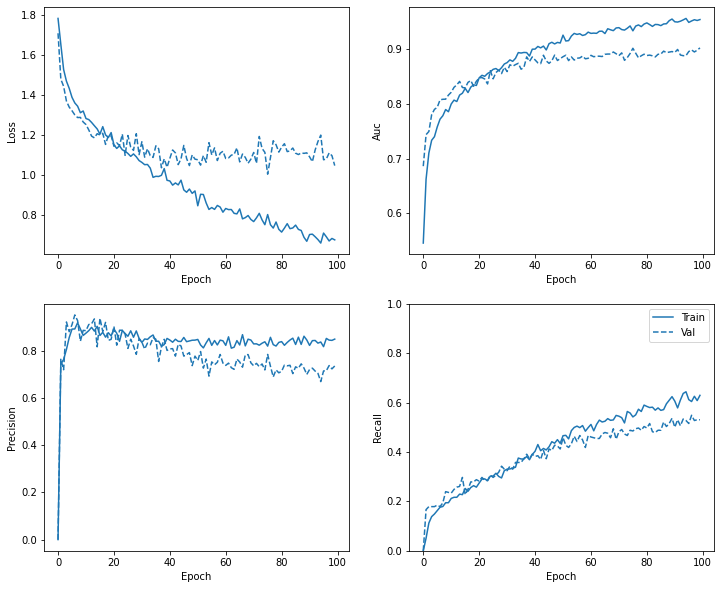

In [208]:
print("Model")
plot_metrics(history)

In [209]:
pred = model.evaluate(X_test, y_test)

metrics_= ['Loss', "True Positives", "False Positives", "True Negatives", "False Negatives", "Accuracy", "Precision", "Recall", "AUC"]

for p, m in zip(pred,metrics_):
  print(f'{m} : {p}')

13/13 [==============================] - 0s 3ms/step - loss: 1.1685 - tp: 203.0000 - fp: 80.0000 - tn: 1980.0000 - fn: 209.0000 - accuracy: 0.5995 - precision: 0.7173 - recall: 0.4927 - auc: 0.8864
Loss : 1.1685281991958618
True Positives : 203.0
False Positives : 80.0
True Negatives : 1980.0
False Negatives : 209.0
Accuracy : 0.5995145440101624
Precision : 0.7173144817352295
Recall : 0.4927184581756592
AUC : 0.8864006996154785


In [210]:
predictions = model.predict(X_test)

predictions = np.around(predictions).astype(np.uint64)

guesses = []

for i in range(0, len(predictions)):
    comparison = y_test[i] == predictions[i]
    equal_arrays = comparison.all()
    guesses.append(equal_arrays)

print("Accuracy:", sum(guesses)/len(guesses))

Accuracy: 0.49271844660194175
